<a href="https://colab.research.google.com/github/jongpark2019/kbtu/blob/main/LogisticRegression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
<p align="justify">In this practice, we introduce how to implement logistic regression with Python. The logistic regression model will be optimized using SGD algorithm which was introduced in SGD_Practice[].</p>

## Theory of Logistic Regression
<p align="justify">The logis regression is formally defined as: given N samples in a dataset $\{(x_i,y_i ):i=1,2,..,n\}$, find a function $h_w (x)$ that minimizes the cost (or loss) function $L(w)$, cross-entropy (CE) error function: 
$$
L(w)=  -\frac{1}{n} \sum_{i=1}^{n}(y_i \log h_w (x_i) + (1 - y_i )\log(1- h_w (x_i))) 
$$
Here, the logistic function $h_w(x) = \frac{1}{1+e^{-wx}}$ is used for prediction. Prediciton is actually a binary classification with true or false. If $h_w(x)$ > threshold, the prediction is true, otherwise the prediction is false. As for the linear regression, we would like to find the value of $w$ which minimizes the cost function $L(w)$ on the given dataset. Note that log in the equation $L(w)$ means the natural logarithm. The logistic function is also called sigmoid function. Below, we plot the $\sigma(z)$ where $z = wx$. </p>

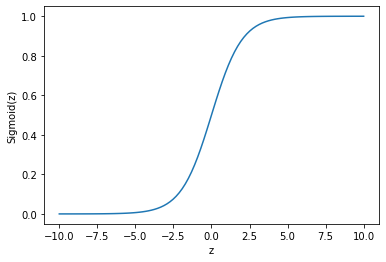

In [ ]:
# Import matplotlib, numpy and math
import matplotlib.pyplot as plt
import numpy as np
import math

z = np.linspace(-10, 10, 100)
sigma_z = 1/(1 + np.exp(-z))
  
plt.plot(z, sigma_z)
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
  
plt.show()

## Example

<p align="justify">For the example of logistic regression with SGD, let’s consider a toy example of taking test to get a driver licence. The test usually consists of both written test and practice test. Here, it is assumed that you already passed the practice test, and you need to take a written test. The dataset in Table below shows the pass (1) or fail (0) results, based only on the score of the written test. The questions is that when you get the score 60, marked X in the graph shown below, will you pass or fail for getting the lincence ? It is also assumed that the score threshold determining fail/pass is not open, so you don't know whether you will pass or fail with the score 60. This kind of problem is known as logistic regression. Contrasting to the linear regression, you want to predict Pass/Fail (or True/False).  

| x (score)| y (pass or fail) | 
|:----------:|:-------------:|
| 30 |  0 | 
| 90 | 1  |  
| 50 | 0 |
| 65 |  1 |
| 70 |  1 |
| 40 |  0 |

</p>

Next, we illustrate the logistic regression using SGD algorithm, step by step.  The dataset is plotted at the figure below where x and y are score and pass/fail for getting driver licence, respectively. Note that for the computational efficiencly, the values of score are divided by 10.
</p>

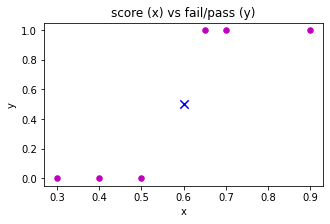

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
dataset = np.array([[.30,  0],
                    [.90,  1],
                    [.50,  0],
                    [.65,  1],
                    [.70,  1],
                    [.40,  0]])
x = dataset[:, 0]
y = dataset[:, 1]
 
# Show the dataset
plt.figure(figsize=(5, 3))
plt.title('score (x) vs fail/pass (y)')
plt.scatter(x, y, color = "m", marker = "o", s = 30)
plt.scatter(0.6, 0.5, color = "b", marker = "x", s = 70)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Minimizing the Cross-Entropy Loss Function
<p align="justify"> With a logistic function for the hypothesis function, i.e., $h_w(x) = \frac{1}{1+e^{-wx}}$, we get the loss fuction for logistic regression with $L(w)$:
$$
L(w)=  -\frac{1}{n} \sum_{i=1}^{n}(y_i\log \sigma(wx_i) + (1 - y_i )\log(1- \sigma(wx_i))) 
$$
where $\sigma(wx_i)$ is defined as $\frac{1}{1+e^{-wx}}$.
Now, we want to optimize the model  $\sigma(wx_i)$ by adjusting the parameter $w$ so that the cross-entropy error (CE) along all samples in the dataset is minimized. We apply the SGD (stochastic gradient descent) algorithm to obtain the optimal solution. As descriced previously[], the SGD works by taking the gradient of the loss function $L(w)$ with respect to the parameter $w$ at a specific position on the loss function, and updates the parameters in the direction of the negative gradient. The parameter $w$ is iteratively updated by taking steps proportional to the negative of the gradient:
$w ← w - η∇L(w)$. Here, $\nabla L(w)$ is defined as:
$$
\nabla L(w) = \frac{\partial L(w)}{\partial w}
$$
For notational simplification, let $o_i = \sigma(wx_i)$ and $z_i = wx_i$. Then, $o_i = \sigma(z_i) = \frac{1}{1+e^{-z_i}}$. In other words, $o_i$ is the predicted output for the sample input $x_i$. Then, 
$$
L(w)=  -\frac{1}{n} \sum_{i=1}^{n}(y_i\log o_i + (1 - y_i )\log(1- o_i)) 
$$
Using the chain rule of differential equation $[g(h(x))]^{'}$ = $g^{'}(h(x))h^{'}(x)$,
$$
\frac{\partial L(w)}{\partial w} = \sum_{i=1}^{n}\frac{\partial L(w)}{\partial o_i}\frac{\partial o_i}{\partial z_i}\frac{\partial z_i}{\partial w}
$$
For a specific sample $k$, we can canculate that: 
$$
\frac{\partial L(w)}{\partial o_k}  =  -\frac{1}{n} \left\{ \frac {y_k \partial \log o_k}{\partial o_k} + \frac {(1-y_k)\partial \log(1- o_k)}{\partial o_k}  \right\}
$$
This results in:
$$
\frac{\partial L(w)}{\partial o_k}  = -\frac{1}{n} \left\{\frac{y_k}{o_k} - 
\frac{1-y_k}{1-o_k}\right\}
$$
Also, for a specific sample $k$,  
$$
\frac{\partial o_k}{\partial z_k} = \frac {\partial (\frac {1}{1+e^{-z_k}})}{\partial z_k} = \frac {e^{-z_k}}{(1+e^{-z_k})^2} = \frac {1}{(1+e^{-z_k})}(1 - \frac {1}{(1+e^{-z_k})}) = o_k (1 - o_k)
$$
And since $z_k = wx_k$, we obtain:
$$\frac{\partial z_k}{\partial w} = x_k$$
So, by simple calculation, we obtain:
$$
\frac{\partial L(w)}{\partial w} = -\frac{1}{n} \sum_{i=1}^{n} \left\{\frac{y_i}{o_i} - \frac{1-y_i}{1-o_i}\right\} o_i (1 - o_i)  x_i = \frac{1}{n} \sum_{i=1}^{n}(o_i - y_i ) x_i
$$
Finally, the full update function $\nabla L(w)$ for the entire dataset will become:
$$
\nabla L(w) = \frac{\partial L(w)}{\partial w} = \frac{1}{n} \sum_{i=1}^{n}(o_i - y_i )x_i = \frac {1}{n} \sum_{i=1}^{n}(\sigma(wx_i) - y_i )x_i 
$$
This formula is actually identical to $\nabla L(w)$ for the linear regression, except that $o_i$ is different. For the case of linear regression, $o_i$ = $wx_i$ []. Note that the formula is for batch gradient descent, and  In other words, all the gradients are caculated and summed up before updating the parameter $w$.  Using mini-batch SGD, a set of mini-batches which are selected randomly can be processed for both train and inference. As in the case of linear regression, $(o_i - y_i ) x_i$ is the gradient for the sample $i$. For online SGD, the weight is updated with $\nabla L(w)$ = $(o_i - y_i ) x_i$. </p> 

<p align="justify">Below, we have implemented the logistic regression with Python, using gradient descent agorithm.  </p>

## Implementation of Logistic Regression with Mini-batch SGD
<p align="justify"> SGD first randomly divides the datset into mini-batches and for each minibatch, the gradient is computed and all parameters are updated. After all mini-batches are used, the next iteration can start until the stopping criteria are met. The stopping criteria usually checks for the convergence. 
Comparing with the code of the linear regression with SGD, the hypothesis function h(x,w) and the loss function are changed. The sigmoid function is newly added for calculation of h(x,w). Function gradient() and function SGD() are identical to those for linear regression [].</p>

Value of weight parameter w: 0.9843
Prediction output with the score 60: 0.6438


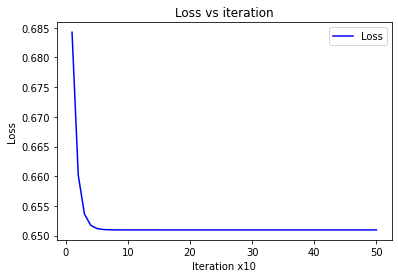

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45) # set the seed value

def sigmoid(x):
    """ Logistic function """
    return 1.0/(1+ np.exp(-x))

def h(x, w):
    """Hypothesis function h(x) = sigmoid (x * w)"""
    return sigmoid(x * w)

def loss(o, y):
    """Cross-entropy error function"""
    return -np.mean(y*np.log(o) + (1-y)*np.log(1-o)) # np.log is natural logarithm


def gradient(x, w, y):
    """Gradient function"""
    return x * (h(x, w) - y)

def SGD(n_iter):
    """ Mini-batch gradient descent optimization"""

    # Initialize learning rate and weight 
    eta = 0.7 # learning rate
    w = 0.05  # Initialize weight
    data = dataset.copy() # get a copy of dataset for shuffling

    # Perform mini-batch SGD optimization
    for i in range(n_iter):

        np.random.shuffle(data) # Randomize the dataset
        x = data[:, 0] # Get input data
        y = data[:, 1] # Get target data
        loss_sum = 0  

        for j in range(num_batch): # Iterate over mini-batches of dataset
            x_batch = x[batch_size * j: batch_size * (j+1)]    # Get a mini-batch of input data x
            y_batch = y[batch_size * j: batch_size * (j+1)]   # Get a mini-batch of target data y
 
            dw = np.mean(gradient(x_batch, w, y_batch)) # Compute gradient estimates ∇L(w) 
            w = w - eta* dw  # Update parameters using the formula  w←w−η∇w
            loss_sum += loss(h(x_batch, w), y_batch) # Sum up losses of mini-batches 

        if (i % 10) == 0:
            loss_avg.append(loss_sum / num_batch) # Get average of mimi-batch loss

    return w, loss_avg        

if __name__ == "__main__":

    # Dataset
    dataset = np.array([[.30,  0],
                        [.90,  1],
                        [.50,  0],
                        [.65,  1],
                        [.70,  1],
                        [.40,  0]])

    batch_size = 6  # Size of mini-batch data
    num_batch = int(dataset.shape[0]/batch_size)  # Number of mini-batches
    loss_avg = [] # Loss average

    w, loss_avg = SGD(500)
    print(f'Value of weight parameter w:{w: .4f}')
    print(f'Prediction output with the score 60:{h(0.9863, 0.60): .4f}')  
    
    # Show the average loss of mini-batch
    plt.figure(figsize=(6, 4))
    iter_count = range(1, len(loss_avg) + 1)
    plt.plot(iter_count, loss_avg, 'b-')
    plt.title('Loss vs iteration')
    plt.legend(['Loss'])
    plt.xlabel('Iteration x10')
    plt.ylabel('Loss')
    plt.show()

<p align="justify"> After training, we have obtained the weight value 0.9843.  Applying this weight value and new score 60 to the hypothesis function, i.e, h(0.9843, 60), we get prediction output with a real value 0.6438. What does this value of 0.6438 imply ? How do we intrepret and get the meamingful prediction ? In order to answer these questions, we need to define a threshold for determing pass or fail based on the prediction output from the hypothesis function h(w,x). As in linear regression, the performance of loss vs iteration is shown. 
</p>

## Threshold for correct prediction
<p align="justify">We can see the prediction output values for the entire input data. In order to  set a proper value of threshold, we have used the average score of the dataset as a threshold value. As desribed in code below, with the average score to determine pass/fail of the dataset, the prediction is identical to pass/fail of the dataset. Applying this threshold for determiniing the pass/fail of the new score 60, it is found that the score 60 will pass the written test for the licence. You can experiment that the new score 55 will result in fail for the test. The setting proper threshold is essential to correct predition for the dataset.  In exercise, you can experment that the prediction is dependent on the threshold value.</p>

In [ ]:
score = h(dataset[:, 0], w) # get predicted output values for input data 
threshold = np.average(score) # get average of predicted output values
# print(threshold)

# Get prediction with threshold of average of output values. 
prediction = [1 if (score[i] > threshold) else 0 for i in range(len(score))] 
print('Prediction for the dataset with average threshold:', prediction)

# Get prediction for new score x
w, _ = SGD(500) 
x = 0.60
#x = 0.55
new_score = h(w, x)
if new_score > threshold:
  print(f'Score {x * 100: .1f} is predicted to pass the written test.')
else:
  print(f'Score {x * 100: .1f} is predicted to fail the written test.')

Prediction for the dataset with average threshold: [0, 1, 0, 1, 1, 0]
Score  60.0 is predicted to pass the written test.


## Exercise: Get predictions by varing the treshold value to threshold+0.02, threshold-0.02 and others. 

In [ ]:
# Get prediction with higher threshold  
prediction_high = [1 if (score[i] > threshold+0.02) else 0 for i in range(len(score))] 
print(f'Prediction with higher treshold value: {prediction_high}')

Prediction with higher treshold value: [0, 1, 0, 0, 1, 0]


## Peformance Metrics for Logistic Regression
<p align="justify"> There are different metrics to measure the performance of any classifier including binary classifier, i.e., the logistic regression. These metrics include confusion metrics, accuracy, precions, recall, specificity, F-1 score, and AUC-ROC curve. </p>
<p align="justify"> For the above example, the confusion matrix summarizes results such as true positive (1), true negative (0), false positive (1), and false negative (0). You may  refer to the reference[] for defition of these concept. The accuracy measures the faction of correct predictions. Precision measures the fraction of correct positive predictions from all the positive predictions. Recall measures the fraction of positive predictions from all the positive samples. Classfication report shows all these metrics together.</p>
<p align="justify"> For skewed dataset where only small portion of dataset samples is positive (or negative), the accuracy may not indicate correctly how good the performance is. In this case, precision and recall are important performance metrics. However, there is a tradoff betweem precision and recall, so that F-1 score is often used to compensate for the limitation of the accuracy for the skewed dataset.F-1 score is a weighted average of the precision and recall, where an F-1 score reaches its best at 1 and worst at 0.
</p>
<p align="justify"> Below, we measure the performance of the model for logistic regression, using sklearn libraries.
</p>

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Y_actual = dataset[:, 1]
Y_predic = prediction
results = confusion_matrix(Y_actual, Y_predic)
print ('Confusion Matrix :\n', results)
print ('Accuracy :', accuracy_score(Y_actual, Y_predic))
print ('Classification Report : \n', classification_report(Y_actual, Y_predic))

Y_predic = prediction_high
results = confusion_matrix(Y_actual, Y_predic)
print ('Confusion Matrix :\n', results)
print ('Accuracy :', accuracy_score(Y_actual, Y_predic))
print ('Classification Report : \n', classification_report(Y_actual, Y_predic))


Confusion Matrix :
 [[3 0]
 [0 3]]
Accuracy : 1.0
Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Confusion Matrix :
 [[3 0]
 [1 2]]
Accuracy : 0.8333333333333334
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



<p align="justify"> We have tested with two prediction: prediction with threshod with average score, and another with a little higher threshold added with 0.02. In the first case, it is shown that the accuracy is 100 %  because the predicted output is identical to acutal y values [0, 1, 0, 1, 1, 0] of the dataset. In the confusion matrix, all the non-diagonal elements are zero. In the second case with higher threshold, the predicited output is [0, 1, 0, 0, 1, 0] so that there is one erroneus classfication. This results in the accuracy of 83 %, i.e., 5/6, and affects other metrics such as F-1 score, precision and recall. AUC-ROC is not shown here for simplicity of explanation. </p>

## Complete Code for Logistic Regression
The complet code of logistic regression of the simple toy example is shown below.

Value of weight parameter w: 0.9843
Prediction output with the score 60: 0.6438


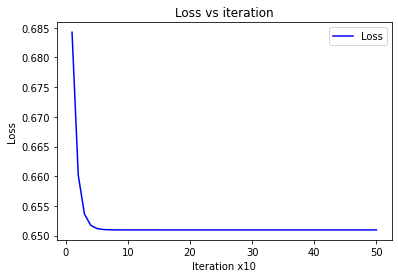

Prediction for the dataset with average threshold: [0, 1, 0, 1, 1, 0]
Score  60.0 is predicted to pass the written test.
Prediction with higher treshold value: [0, 1, 0, 0, 1, 0]
Confusion Matrix :
 [[3 0]
 [0 3]]
Accuracy : 1.0
Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Confusion Matrix :
 [[3 0]
 [1 2]]
Accuracy : 0.8333333333333334
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45) # set the seed value

def sigmoid(x):
    """ Logistic function """
    return 1.0/(1+ np.exp(-x))

def h(x, w):
    """Hypothesis function h(x) = sigmoid (x * w)"""
    return sigmoid(x * w)

def loss(o, y):
    """Cross-entropy error function"""
    return -np.mean(y*np.log(o) + (1-y)*np.log(1-o)) # np.log is natural logarithm


def gradient(x, w, y):
    """Gradient function"""
    return x * (h(x, w) - y)

def SGD(n_iter):
    """ Mini-batch gradient descent optimization"""

    # Initialize learning rate and weight 
    eta = 0.7 # learning rate
    w = 0.05  # Initialize weight
    data = dataset.copy() # get a copy of dataset for shuffling

    # Perform mini-batch SGD optimization
    for i in range(n_iter):

        np.random.shuffle(data) # Randomize the dataset
        x = data[:, 0] # Get input data
        y = data[:, 1] # Get target data
        loss_sum = 0  

        for j in range(num_batch): # Iterate over mini-batches of dataset
            x_batch = x[batch_size * j: batch_size * (j+1)]    # Get a mini-batch of input data x
            y_batch = y[batch_size * j: batch_size * (j+1)]   # Get a mini-batch of target data y

            dw = np.mean(gradient(x_batch, w, y_batch)) # Compute gradient estimates ∇L(w) 
            w = w - eta* dw  # Update parameters using the formula  w←w−η∇w
            loss_sum += loss(h(x_batch, w), y_batch) # Sum up losses of mini-batches 

        if (i % 10) == 0:
            loss_avg.append(loss_sum / num_batch) # Get average of mimi-batch loss

    return w, loss_avg        

if __name__ == "__main__":

    # Dataset
    dataset = np.array([[.30,  0],
                        [.90,  1],
                        [.50,  0],
                        [.65,  1],
                        [.70,  1],
                        [.40,  0]])

    batch_size = 6  # Size of mini-batch data
    num_batch = int(dataset.shape[0]/batch_size)  # Number of mini-batches
    loss_avg = [] # Loss average

    w, loss_avg = SGD(500)
    print(f'Value of weight parameter w:{w: .4f}')
    print(f'Prediction output with the score 60:{h(0.9863, 0.60): .4f}')  
    
    # Show the average loss of mini-batch
    plt.figure(figsize=(6, 4))
    iter_count = range(1, len(loss_avg) + 1)
    plt.plot(iter_count, loss_avg, 'b-')
    plt.title('Loss vs iteration')
    plt.legend(['Loss'])
    plt.xlabel('Iteration x10')
    plt.ylabel('Loss')
    plt.show()

    score = h(dataset[:, 0], w) # get predicted output values for input data 
    threshold = np.average(score) # get average of predicted output values

    # Get prediction with threshold of average of output values. 
    prediction = [1 if (score[i] > threshold) else 0 for i in range(len(score))] 
    print('Prediction for the dataset with average threshold:', prediction)

    # Get prediction for new score x
    w, _ = SGD(500) 
    x = 0.60
    new_score = h(w, x)
    if new_score > threshold:
        print(f'Score {x * 100: .1f} is predicted to pass the written test.')
    else:
        print(f'Score {x * 100: .1f} is predicted to fail the written test.')

    # Get prediction with higher threshold  
    prediction_high = [1 if (score[i] > threshold+0.02) else 0 for i in range(len(score))] 
    print(f'Prediction with higher treshold value: {prediction_high}')

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report

    Y_actual = dataset[:, 1]
    Y_predic = prediction
    results = confusion_matrix(Y_actual, Y_predic)
    print ('Confusion Matrix :\n', results)
    print ('Accuracy :', accuracy_score(Y_actual, Y_predic))
    print ('Classification Report : \n', classification_report(Y_actual, Y_predic))

    Y_predic = prediction_high
    results = confusion_matrix(Y_actual, Y_predic)
    print ('Confusion Matrix :\n', results)
    print ('Accuracy :', accuracy_score(Y_actual, Y_predic))
    print ('Classification Report : \n', classification_report(Y_actual, Y_predic))

##Exercise: Implement logistic regression with Python and Keras/Tensorflow.